# SVM
- svm 이진 분류
- 피마 인디언 당뇨병 여부 예측

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

## 데이터 준비

In [ ]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
df = diabetes.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 범주형 변수

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

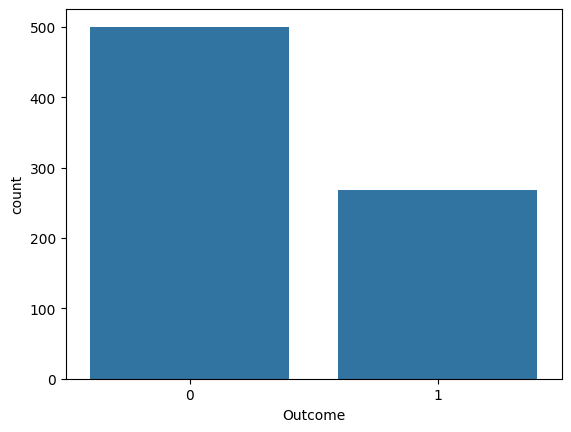

In [ ]:
sns.countplot(df,x='Outcome')
plt.show()

### 연속형 변수

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
tmp = df['Pregnancies'].sort_values(ascending=False)
tmp

159    17
88     15
298    14
455    14
274    13
       ..
291     0
608     0
294     0
297     0
466     0
Name: Pregnancies, Length: 768, dtype: int64

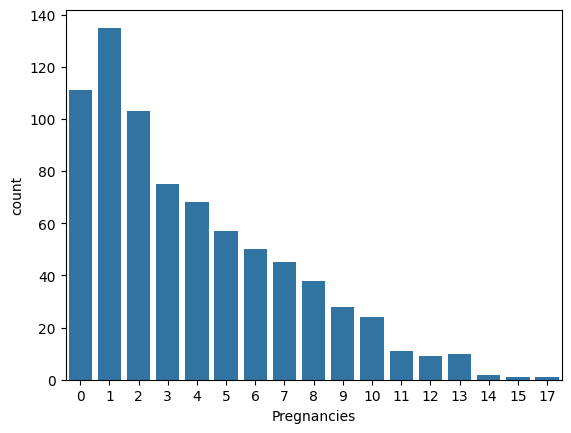

In [ ]:
sns.countplot(x='Pregnancies',data=df)
plt.show()

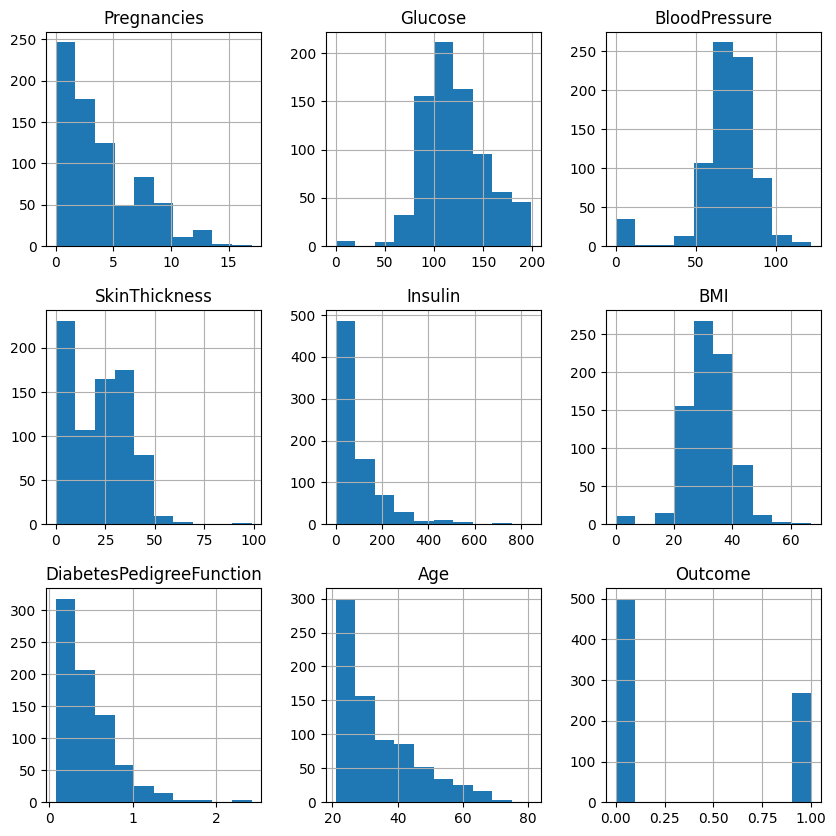

In [ ]:
df.hist(figsize=(10,10))
plt.show()

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, shuffle=True, random_state=SEED, stratify=df['Outcome'])
train.shape, test.shape

((691, 9), (77, 9))

In [ ]:
train['Outcome'].value_counts()

Outcome
0    450
1    241
Name: count, dtype: int64

### X, y 변수 분리

In [ ]:
X_train = train.drop(['Outcome'], axis=1)
y_train = train['Outcome']
X_train.shape, y_train.shape

((691, 8), (691,))

## 이상치 처리

In [ ]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
255,1,113,64,35,0,33.6,0.543,21
125,1,88,30,42,99,55.0,0.496,26
46,1,146,56,0,0,29.7,0.564,29
312,2,155,74,17,96,26.6,0.433,27
519,6,129,90,7,326,19.6,0.582,60


<Axes: >

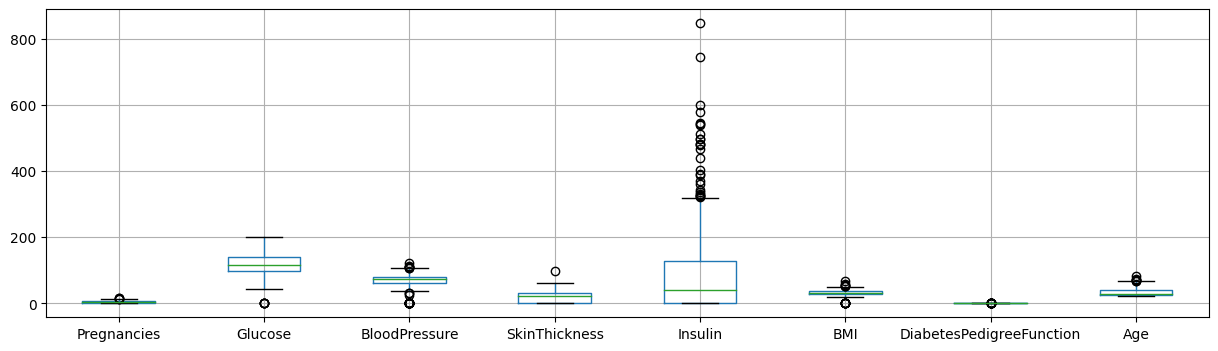

In [ ]:
X_train.boxplot(figsize=(15,4))

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# 이상치 0인값을 특정값(중간값)으로 치환
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
med = {} # 이상치들의 median값 dict로 저장
for col in col_list:
    med[col] = X_train[col].median()
    X_train.loc[X_train[col] == 0, col] = med[col]
    print(f'{col} median : {med[col]}')

Glucose median : 117.0
BloodPressure median : 72.0
SkinThickness median : 23.0
Insulin median : 40.0
BMI median : 32.0


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,691.0,3.875543,3.385240,0.000,1.0000,3.000,6.000,17.000
Glucose,691.0,121.616498,30.280557,44.000,99.0000,117.000,139.500,199.000
BloodPressure,691.0,72.178003,12.217065,24.000,64.0000,72.000,80.000,122.000
SkinThickness,691.0,27.246020,9.168644,7.000,23.0000,23.000,32.000,99.000
Insulin,691.0,98.548480,99.824652,15.000,40.0000,40.000,127.500,846.000
BMI,691.0,32.360347,6.735955,18.200,27.6000,32.000,36.450,67.100
DiabetesPedigreeFunction,691.0,0.473376,0.330139,0.078,0.2445,0.378,0.628,2.329
Age,691.0,33.410999,11.759256,21.000,24.0000,29.000,41.000,81.000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

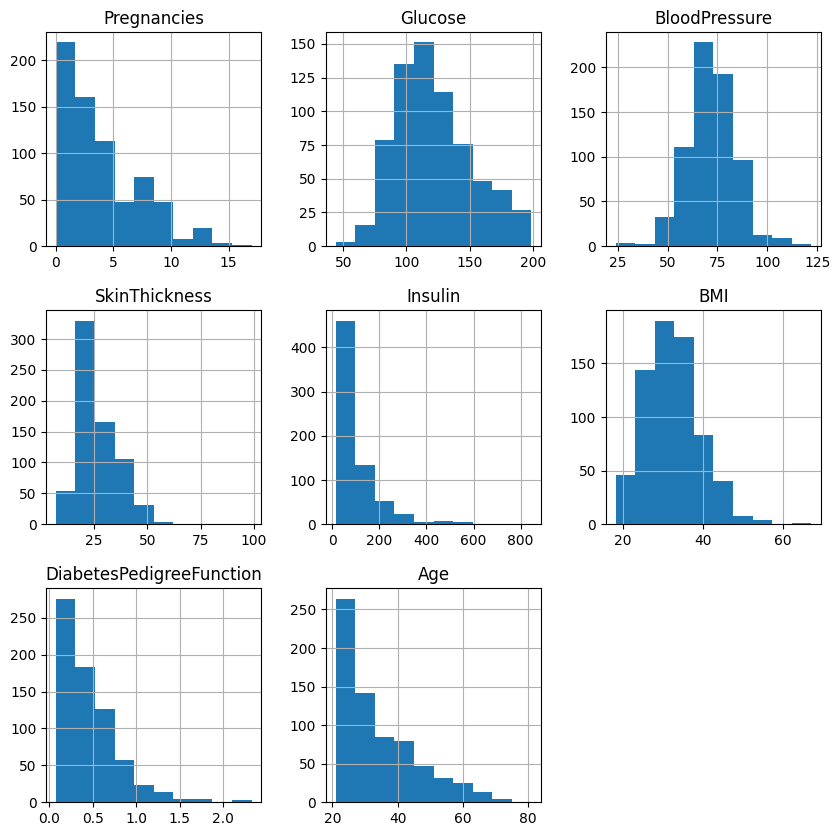

In [ ]:
X_train.hist(figsize=(10,10))
plt.show()

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train) # dataframe 넣어도 numpy array로 나옴

In [ ]:
X_train_s

array([[-0.8500507 , -0.28476158, -0.66987668, ...,  0.18416848,
         0.2110448 , -1.05618828],
       [-0.8500507 , -1.11097193, -3.45488511, ...,  3.36345057,
         0.0685775 , -0.63068332],
       [-0.8500507 ,  0.80583607, -1.32517278, ..., -0.39523339,
         0.27470041, -0.37538035],
       ...,
       [-0.8500507 , -0.8135362 , -0.1784046 , ...,  0.85270911,
        -0.77410146, -0.29027936],
       [-1.1456647 , -0.58219731, -0.66987668, ...,  0.18416848,
         0.11101457, -0.97108729],
       [ 0.03679132,  0.73973924, -1.16134875, ..., -0.42494631,
        -0.56494733,  0.30542758]])

In [ ]:
ss.mean_, ss.var_

(array([  3.87554269, 121.61649783,  72.17800289,  27.24602026,
         98.54848046,  32.36034732,   0.47337627,  33.41099855]),
 array([1.14432658e+01, 9.15585198e+02, 1.49040674e+02, 8.39423684e+01,
        9.95053998e+03, 4.53074291e+01, 1.08834177e-01, 1.38079995e+02]))

In [ ]:
y_train_e = y_train.to_numpy()
type(y_train_e)

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(691, 8) (691,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 모델 학습

In [ ]:
from sklearn.svm import SVC

clf = SVC(random_state=SEED)
clf.fit(X_train_s,y_train_e)

SVC(random_state=42)

### test 데이터 전처리

In [ ]:
X_test = test.drop(['Outcome'], axis=1)
y_test = test['Outcome']

In [ ]:
for col in col_list:
    X_test.loc[X_test[col] == 0, col] = med[col]
    print(f'{col} median : {med[col]}')

Glucose median : 117.0
BloodPressure median : 72.0
SkinThickness median : 23.0
Insulin median : 40.0
BMI median : 32.0


In [ ]:
X_test_s = ss.transform(X_test)
y_test_e = y_test.to_numpy()

In [ ]:
print(X_test_s.shape,y_test_e.shape)
print(type(X_test_s), type(y_test_e))

(77, 8) (77,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### test 데이터 예측 및 평가

In [ ]:
y_pred = clf.predict(X_test_s)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('{%12s}'.format('accuracy : '), accuracy_score(y_true, y_pred))
    print('{%12s}'.format('recall : '), recall_score(y_true, y_pred, average=aver))
    print('{%12s}'.format('precision : '), precision_score(y_true, y_pred, average=aver))
    print('{%12s}'.format('f1 : '), f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (5,5))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

accuracy :  0.7662337662337663
recall :  0.5925925925925926
precision :  0.6956521739130435
f1 :  0.6399999999999999
-------------------------------------------------------


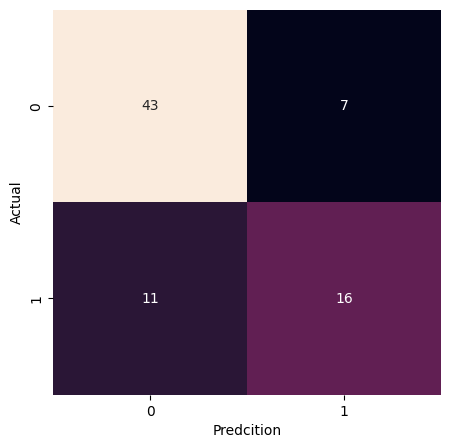

In [ ]:
print_metrics(y_test_e, y_pred)

## 모델 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

prams_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : [1, 0.1, 0.01],
}

clf = SVC(random_state=SEED)
grid_search = GridSearchCV(clf,
                            param_grid = prams_grid,
                            cv=3,
                            n_jobs=-1,
                            refit=True,
                            return_train_score=True)

grid_search.fit(X_train_s,y_train_e)

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             return_train_score=True)

In [ ]:
grid_search.best_estimator_

SVC(C=1, gamma=0.1, random_state=42)

In [ ]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

accuracy :  0.7532467532467533
recall :  0.5925925925925926
precision :  0.6666666666666666
f1 :  0.627450980392157
-------------------------------------------------------


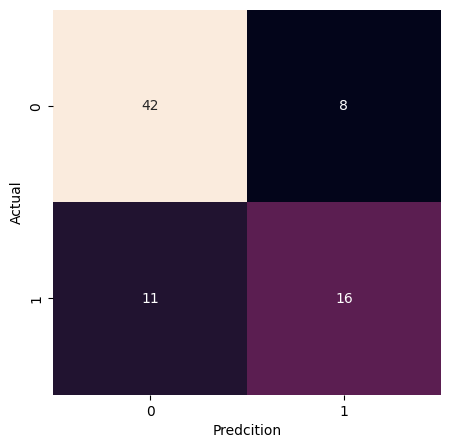

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test_s)
print_metrics(y_test_e,y_pred)